<a href="https://colab.research.google.com/github/dariaccc/kaggle_loandataset/blob/main/kaggle_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#git

In [2]:
#used for shell commands
!ls

sample_data


In [3]:
!pip install -q kaggle
!pip install opendatasets

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dariaccc","key":"deeaf9bb31a6088afc65f35aa9cf3c3b"}'}

In [5]:
import opendatasets as od
od.download ("https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/data")

Dataset URL: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset


In [6]:
#imports
from matplotlib import pyplot as plt #for scatter plot
from sklearn.linear_model import LogisticRegression #for logistic regression
from sklearn.model_selection import train_test_split #for splitting the data set
from sklearn.metrics import confusion_matrix, classification_report #for visualising the confusion matrix and other metrics
from sklearn.preprocessing import OrdinalEncoder #for transforming rejected/approved to 0 and 1
from sklearn.tree import DecisionTreeClassifier #for decision tree classifier
import pandas as pd #to work with data

In [7]:
#generate the dataset from kaggle using pandas
loan_df = pd.read_csv("/content/loan-approval-prediction-dataset/loan_approval_dataset.csv")
loan_df.columns = loan_df.columns.str.strip() #remove spaces

loan_df["education"] = loan_df["education"].str.strip()
loan_df["self_employed"] = loan_df["self_employed"].str.strip()
loan_df.columns.tolist() #print list to get the correct names of columns

['loan_id',
 'no_of_dependents',
 'education',
 'self_employed',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value',
 'loan_status']

In [8]:
#rejected/approved to binary values
loan_stat = [" Rejected", " Approved"]
enc = OrdinalEncoder(categories=[loan_stat])
loan_df["loan_status"] = enc.fit_transform(loan_df[["loan_status"]])
print(loan_df)

      loan_id  no_of_dependents     education self_employed  income_annum  \
0           1                 2      Graduate            No       9600000   
1           2                 0  Not Graduate           Yes       4100000   
2           3                 3      Graduate            No       9100000   
3           4                 3      Graduate            No       8200000   
4           5                 5  Not Graduate           Yes       9800000   
...       ...               ...           ...           ...           ...   
4264     4265                 5      Graduate           Yes       1000000   
4265     4266                 0  Not Graduate           Yes       3300000   
4266     4267                 2  Not Graduate            No       6500000   
4267     4268                 1  Not Graduate            No       4100000   
4268     4269                 1      Graduate            No       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0   

In [9]:
#binary values for graduate and self employed
grad = ["Not Graduate", "Graduate"]
enc = OrdinalEncoder(categories=[grad])
loan_df["education"] = enc.fit_transform(loan_df[["education"]])

employed = ["No", "Yes"]
enc = OrdinalEncoder(categories=[employed])
loan_df["self_employed"] = enc.fit_transform(loan_df[["self_employed"]])
print(loan_df)

      loan_id  no_of_dependents  education  self_employed  income_annum  \
0           1                 2        1.0            0.0       9600000   
1           2                 0        0.0            1.0       4100000   
2           3                 3        1.0            0.0       9100000   
3           4                 3        1.0            0.0       8200000   
4           5                 5        0.0            1.0       9800000   
...       ...               ...        ...            ...           ...   
4264     4265                 5        1.0            1.0       1000000   
4265     4266                 0        0.0            1.0       3300000   
4266     4267                 2        0.0            0.0       6500000   
4267     4268                 1        0.0            0.0       4100000   
4268     4269                 1        1.0            0.0       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12

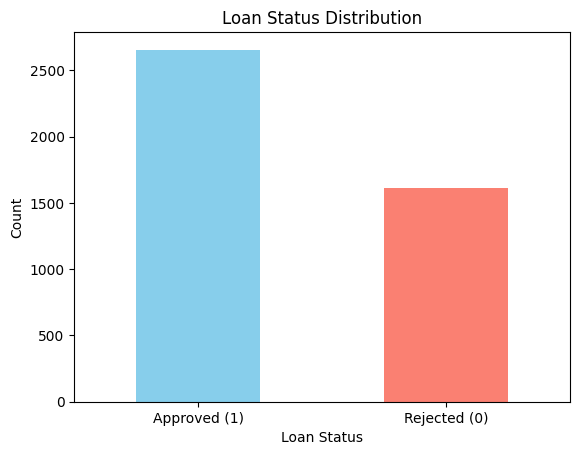

In [10]:
counts = loan_df["loan_status"].value_counts()

# bar chart
counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Approved (1)', 'Rejected (0)'], rotation=0)
plt.show()

In [11]:
#split the dataset
x = loan_df.drop(columns=["loan_status"])
y = loan_df["loan_status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)
#x_train.head()

In [12]:
print(x_train.dtypes)
print(y_train.dtypes)

loan_id                       int64
no_of_dependents              int64
education                   float64
self_employed               float64
income_annum                  int64
loan_amount                   int64
loan_term                     int64
cibil_score                   int64
residential_assets_value      int64
commercial_assets_value       int64
luxury_assets_value           int64
bank_asset_value              int64
dtype: object
float64


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # supports l1 and l2
}

grid = GridSearchCV(LogisticRegression(), param_grid=params, cv=5)
grid.fit(x_train, y_train)
print(grid.best_params_)

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [13]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5)
grid.fit(x_train, y_train)
print(grid.best_params_)


{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [15]:
#create a logistic regression object then perform logistic regression
log_reg = LogisticRegression(max_iter=300)
log_reg.fit(x_train, y_train)
y_pred_lg = log_reg.predict(x_test)

In [16]:
#create the decision tree classifier and perform it
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)
y_pred_dtc = dec_tree.predict(x_test)

In [17]:
print(log_reg.score(x_test,y_test))
print(confusion_matrix(y_test, y_pred_lg))
report_lg = classification_report(y_test, y_pred_lg, output_dict=True)
print(report_lg)

0.7939110070257611
[[210 123]
 [ 53 468]]
{'0.0': {'precision': 0.7984790874524715, 'recall': 0.6306306306306306, 'f1-score': 0.7046979865771812, 'support': 333.0}, '1.0': {'precision': 0.7918781725888325, 'recall': 0.8982725527831094, 'f1-score': 0.841726618705036, 'support': 521.0}, 'accuracy': 0.7939110070257611, 'macro avg': {'precision': 0.795178630020652, 'recall': 0.7644515917068699, 'f1-score': 0.7732123026411086, 'support': 854.0}, 'weighted avg': {'precision': 0.7944520656211415, 'recall': 0.7939110070257611, 'f1-score': 0.7882950794795377, 'support': 854.0}}


In [18]:
print(dec_tree.score(x_test,y_test))
print(confusion_matrix(y_test, y_pred_dtc))
report_dtc = classification_report(y_test, y_pred_dtc, output_dict=True)
print(report_dtc)

0.9718969555035128
[[323  10]
 [ 14 507]]
{'0.0': {'precision': 0.9584569732937686, 'recall': 0.96996996996997, 'f1-score': 0.9641791044776119, 'support': 333.0}, '1.0': {'precision': 0.9806576402321083, 'recall': 0.9731285988483686, 'f1-score': 0.976878612716763, 'support': 521.0}, 'accuracy': 0.9718969555035128, 'macro avg': {'precision': 0.9695573067629384, 'recall': 0.9715492844091693, 'f1-score': 0.9705288585971874, 'support': 854.0}, 'weighted avg': {'precision': 0.9720009398919829, 'recall': 0.9718969555035128, 'f1-score': 0.9719266967406069, 'support': 854.0}}


Text(0.5, 1.0, 'Decision Tree Classifier')

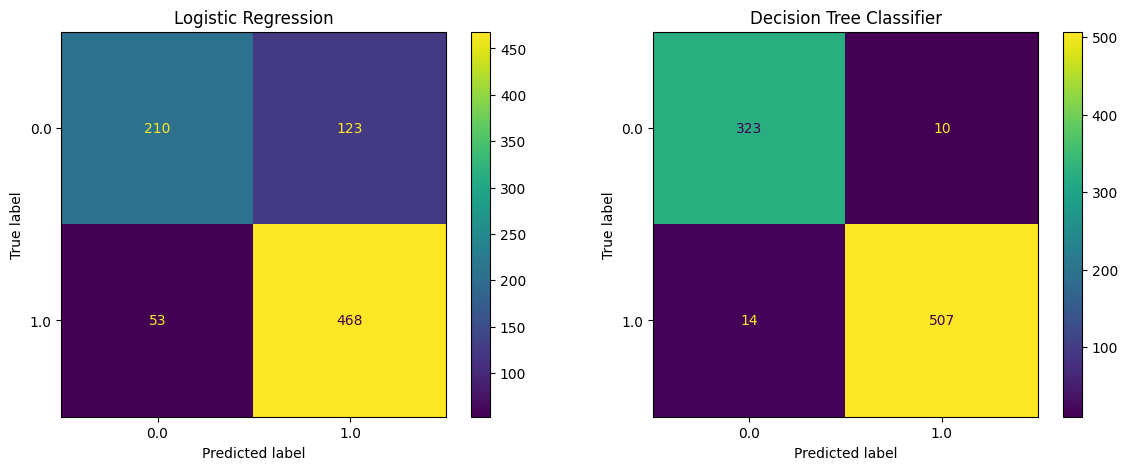

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ConfusionMatrixDisplay.from_estimator(log_reg, x_test, y_test, ax=axes[0])
axes[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_estimator(dec_tree, x_test, y_test, ax=axes[1])
axes[1].set_title("Decision Tree Classifier")

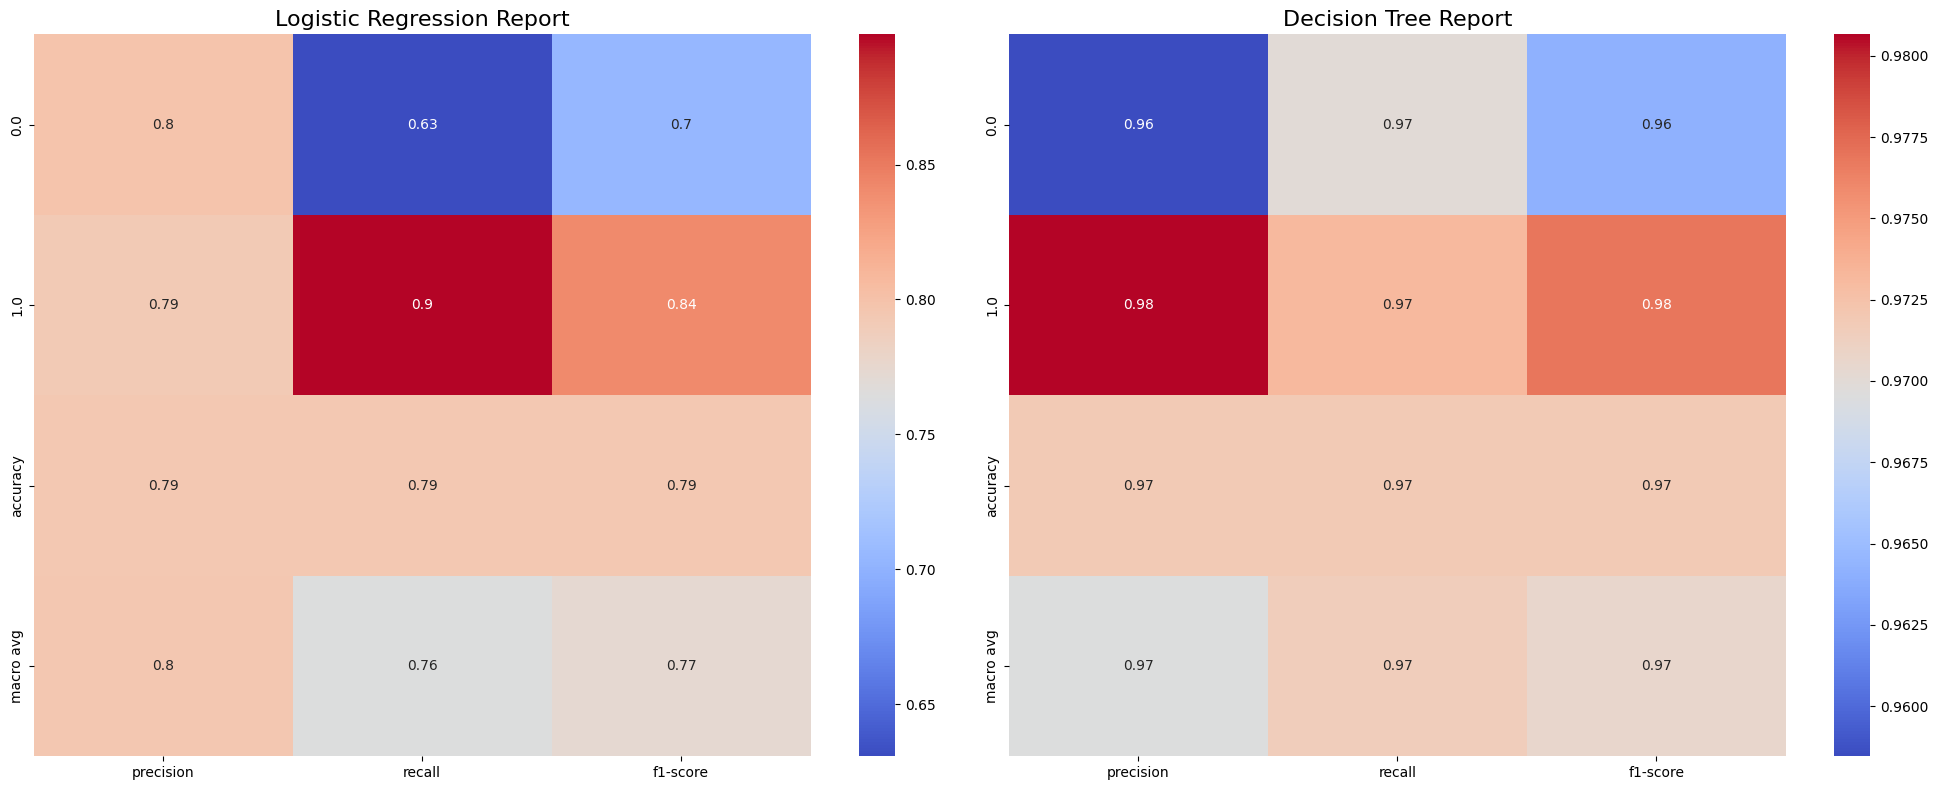

In [20]:
import seaborn as sns

#convert the report to a data frame
report_df_lg = pd.DataFrame(report_lg).transpose()
report_df_dtc = pd.DataFrame(report_dtc).transpose()

#remove the macro avg
report_df_lg_clean = report_df_lg.drop(['macro avg'])
report_df_dtc_clean = report_df_dtc.drop(['macro avg'])

#create a figure to show the reports side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

#lg heatmap
sns.heatmap(report_df_lg.iloc[:-1, :-1], annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Logistic Regression Report', fontsize=16)

#dtc heatmap
sns.heatmap(report_df_dtc.iloc[:-1, :-1], annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Decision Tree Report', fontsize=16)

plt.tight_layout()
plt.show()